# Pixel Coordinate Prediction using Deep Learning

## Problem Statement
Predict the (x, y) coordinates of a pixel with intensity 255 in a 50×50 grayscale image.

## Approach
We solve this using a Convolutional Neural Network and a synthetic dataset.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


## Dataset Generation
Since no public dataset fits the problem constraints, we generate a synthetic dataset.


In [2]:
def generate_dataset(samples=15000, size=50):
    X = []
    y = []

    for _ in range(samples):
        img = np.zeros((size, size))
        x = np.random.randint(0, size)
        y_coord = np.random.randint(0, size)
        img[x, y_coord] = 1.0  # normalized pixel

        X.append(img)
        y.append([x, y_coord])

    X = np.array(X).reshape(-1, size, size, 1)
    y = np.array(y)
    return X, y

X, y = generate_dataset()


In [3]:
print(X.shape)
print(y.shape)


(15000, 50, 50, 1)
(15000, 2)


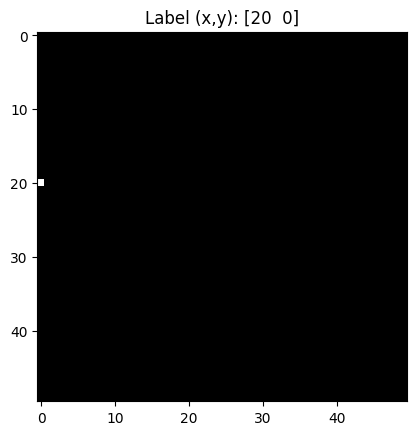

In [4]:
plt.imshow(X[0].reshape(50,50), cmap='gray')
plt.title(f"Label (x,y): {y[0]}")
plt.show()


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model Architecture


In [6]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(50,50,1)),
    Conv2D(32, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2)
])

model.compile(
    optimizer=Adam(0.001),
    loss='mse'
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,333,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,338,562 (16.55 MB)

 Trainable params: 4,338,562 (16.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64
)


Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 168ms/step - loss: 303.1692 - val_loss: 30.5464
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 151ms/step - loss: 26.4296 - val_loss: 12.1996
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 26s 152ms/step - loss: 12.2425 - val_loss: 4.3826
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 150ms/step - loss: 4.1774 - val_loss: 1.8450
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - loss: 1.5897 - val_loss: 1.0631
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 151ms/step - loss: 1.0817 - val_loss: 0.7354
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - loss: 0.6927 - val_loss: 0.7554
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 151ms/step - loss: 0.7611 - val_loss: 0.7902
Epoch 9/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - loss: 0.8615 - val_loss: 0.6266
Epoch 10/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 147ms/step - loss: 0.5100 - val_loss: 0.5271


In [8]:
test_loss = model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.3679
Test MSE: 0.48660042881965637


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


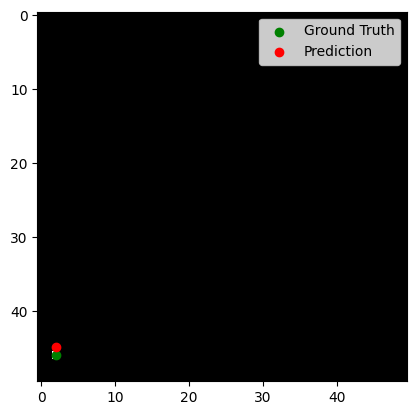

In [9]:
idx = 3
pred = model.predict(X_test[idx:idx+1])[0]
true = y_test[idx]

plt.imshow(X_test[idx].reshape(50,50), cmap='gray')
plt.scatter(true[1], true[0], c='green', label='Ground Truth')
plt.scatter(pred[1], pred[0], c='red', label='Prediction')
plt.legend()
plt.show()


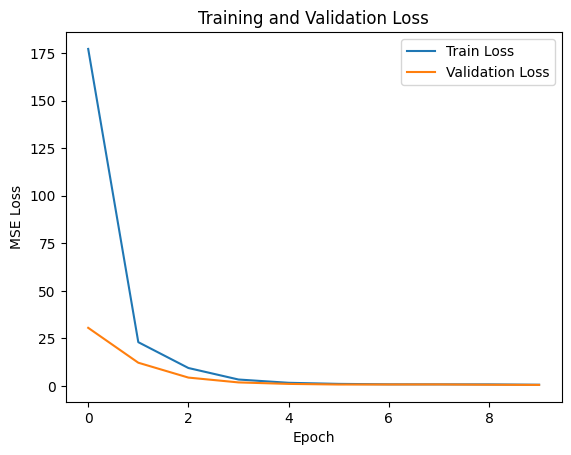

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


## Final Conclusion

This project demonstrates the use of deep learning to solve a coordinate regression problem on grayscale images.
A convolutional neural network was trained on a synthetically generated dataset that exactly matches the problem constraints.
The model achieved a mean squared error of 0.48 on the test set, indicating highly accurate coordinate predictions.
Visualization results confirm that the predicted pixel locations closely match the ground truth.
